In [1]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise

from skimage.exposure import histogram
from matplotlib.pyplot import bar


In [2]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

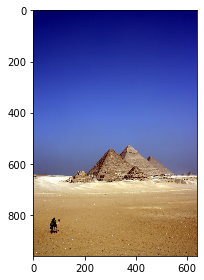

In [3]:
# Ex: imread and imshow 
pyramids = io.imread('pyramids.jpeg')
io.imshow(pyramids)
io.show()



In [4]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

Coffee image shape:  (446, 640, 3)
Vertical Half Coffee image shape:  (446, 320, 3)
Horizontal Half Coffee image shape:  (223, 640, 3)


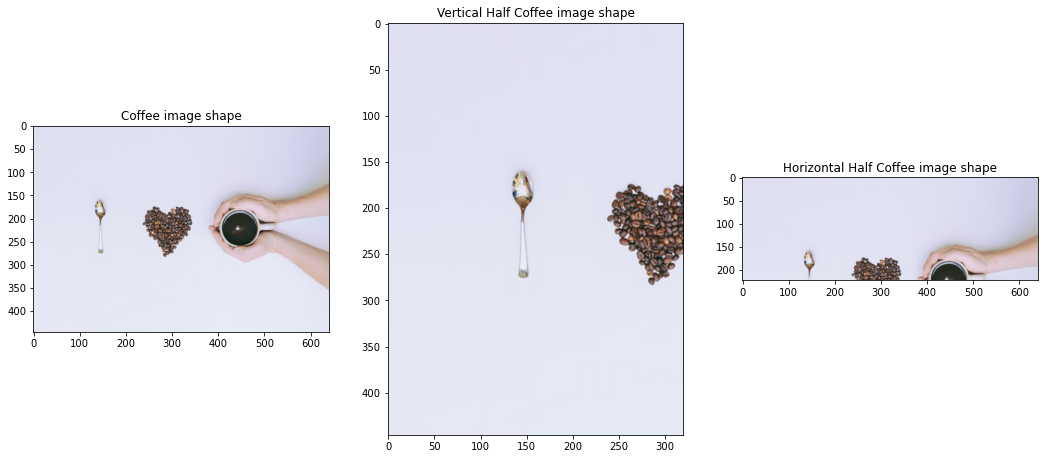

In [5]:
'''
@TODO:
Requirement #1   
-----hint :use the attribute shape of numpy to get the image object dimentions
'''

'''Read and print image coffee'''
coffee = io.imread('coffee.jpeg')
print('Coffee image shape: ', coffee.shape)
#io.imshow(coffee)

'''Show and print half of the image'''
rows, cols, _ = coffee.shape
half_rows, half_cols = rows//2, cols//2

vertical_half_coffee = coffee[:, :half_cols]
print('Vertical Half Coffee image shape: ', vertical_half_coffee.shape)
#io.imshow(vertical_half_coffee)

horizontal_half_coffee = coffee[:half_rows]
print('Horizontal Half Coffee image shape: ', horizontal_half_coffee.shape)
#io.imshow(horizontal_half_coffee)

show_images([coffee, vertical_half_coffee, horizontal_half_coffee], ['Coffee image shape', 'Vertical Half Coffee image shape', 'Horizontal Half Coffee image shape'])


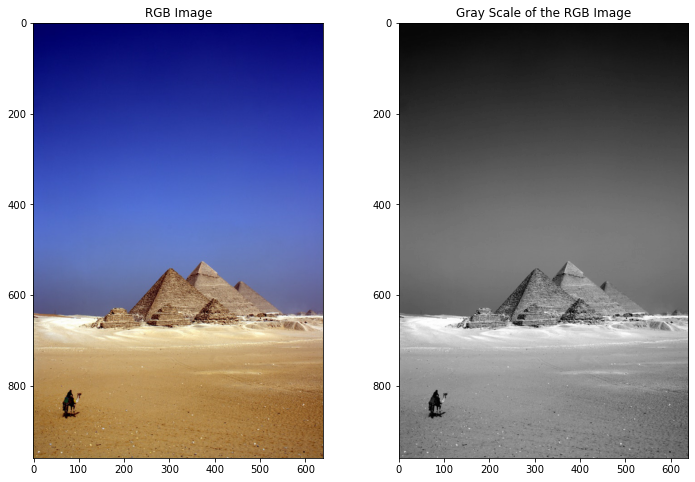

In [6]:
'''
@TODO:
Requirement #2 
RGB to gray and HSV:
'''

# 1- Write a function 'gray_image' that takes an image as input
def gray_image(image_path):
    # Read the image
    image = io.imread(image_path)
    # Get the gray scale of the image
    gray_scale = rgb2gray(image)
    # Display original image and the gray scale one side by side
    show_images([image, gray_scale], ['RGB Image', 'Gray Scale of the RGB Image'])

# Test your function with the image 'pyramids'
gray_image('pyramids.jpeg')

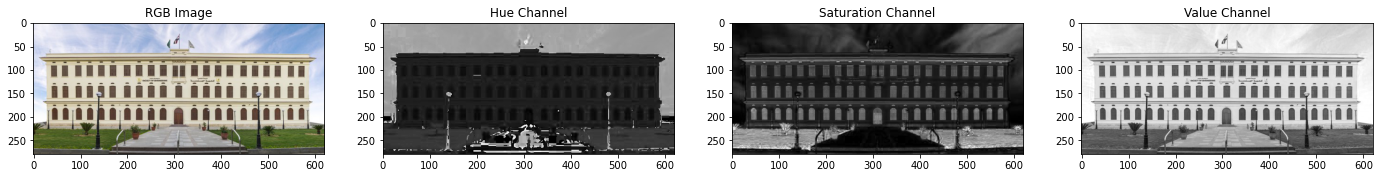

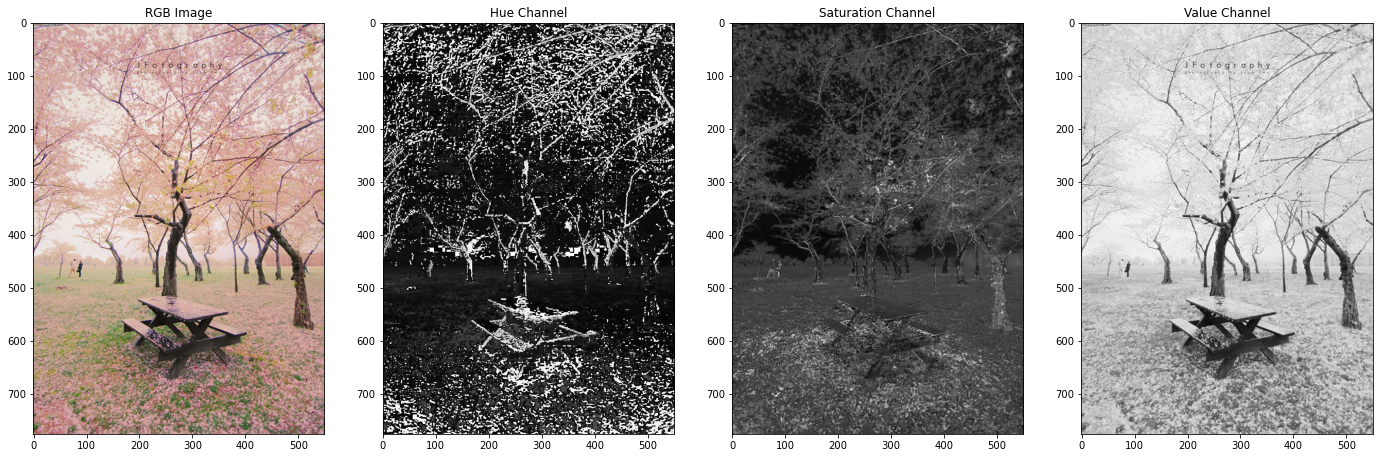

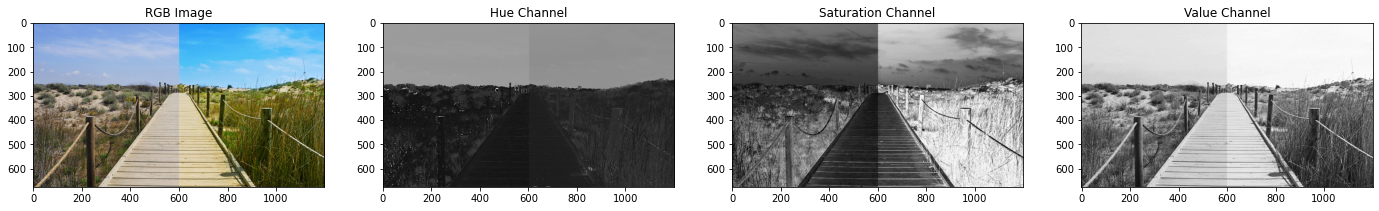

HSV values are high in the more bright images which maeans pixels that are closer to white color, have higher HSV values


In [14]:
# 2- Write a function 'HSV_image' that takes an image as input
def HSV_image(image_path):
    # Read the image
    image = io.imread(image_path)
    # Get the HSV of the image
    hsv_image = rgb2hsv(image)
    hue = hsv_image[:, :, 0]
    sat = hsv_image[:, :, 1]
    val = hsv_image[:, :, 2]
    # show the RGB image and the HSV one side by side
    show_images([image, hue, sat, val], ['RGB Image', 'Hue Channel', 'Saturation Channel', 'Value Channel'])

# Test your function for the images in HSV Folder. And comment on the results
HSV_image('./hsv/ex1.png')
HSV_image('./hsv/ex2.jpg')
HSV_image('./hsv/ex3.jpg')
print('HSV values are high in the more bright images which maeans pixels that are closer to white color, have higher HSV values')

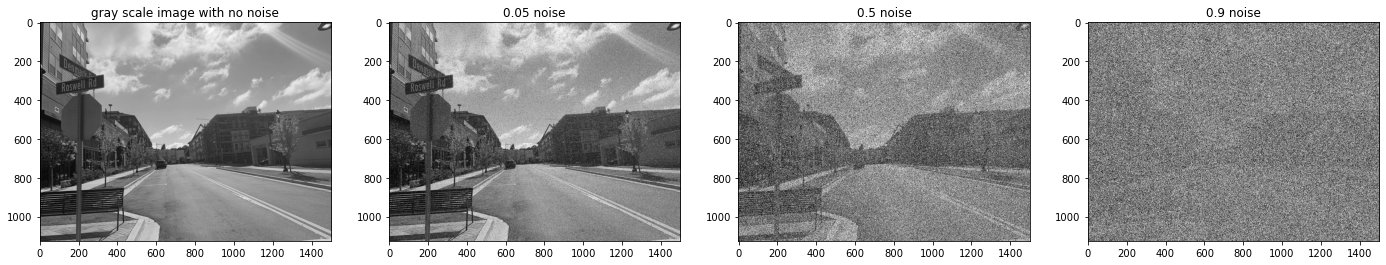

'   \n2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    \n'

In [8]:
def add_noise(image_path):
    # Read the image.
    street =io.imread(image_path)
    # Convert it to greyscale.
    grayscale = rgb2gray(street)
    # Apply salt & pepper noise with amount=0.05, 0.5 and 0.9
    noisy1 = random_noise(grayscale,mode='s&p',amount = 0.05)
    noisy2 = random_noise(grayscale,mode='s&p',amount = 0.5)
    noisy3 = random_noise(grayscale,mode='s&p',amount = 0.9)
    show_images([grayscale,noisy1,noisy2,noisy3],['gray scale image with no noise','0.05 noise','0.5 noise','0.9 noise'])

'''   
2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    
'''
add_noise('street.jpg')
add_noise('coffee.jpeg')
add_noise('pyramids.jpeg')
add_noise('./hsv/ex1.png')
add_noise('./hsv/ex2.jpg')
add_noise('./hsv/ex3.jpg')
add_noise('./hsv/ex1.png')
add_noise('./hsv/ex2.jpg')
add_noise('./hsv/ex3.jpg')


bins indicates number of available intensities so diffrent values show diffrent number of intensities for image


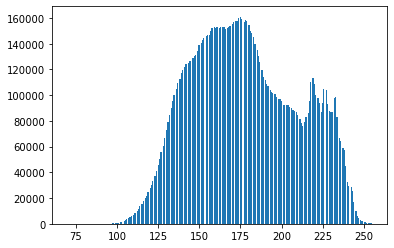

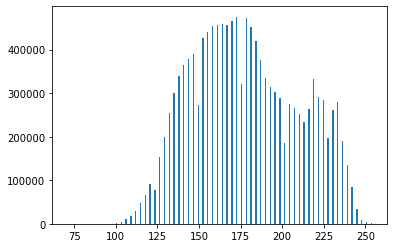

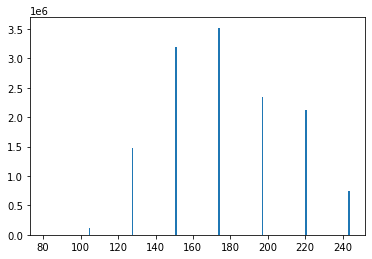

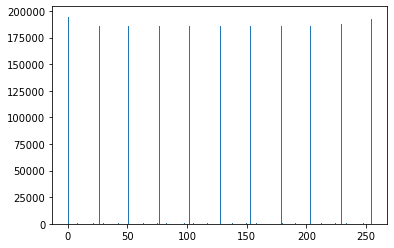

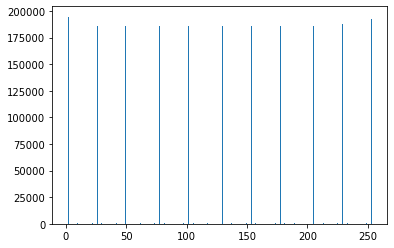

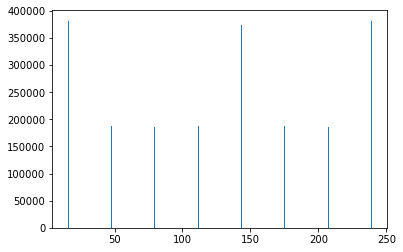

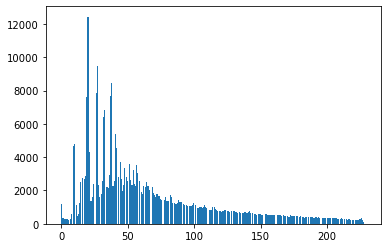

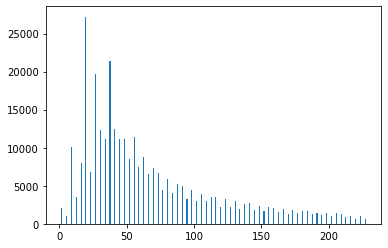

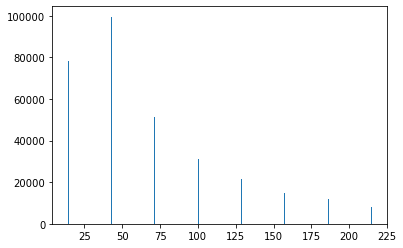

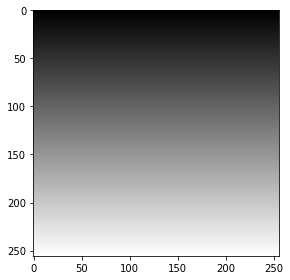

In [10]:
# Requirement 3 (Histogram):

'''
1- For the given images ( in histogram folder): 
    Read the image.
    Apply histogram and show it.
'''
def DrawHistogram(img,nbin):
    img = rgb2gray(img)
    his = histogram(img,nbin)
    showHist(img,his)

# Try different values for nbins (256,64,8)
img = io.imread('./histogram/ex1.jpg')
DrawHistogram(img,256)
DrawHistogram(img,64)
DrawHistogram(img,8)
img = io.imread('./histogram/ex2.png')
DrawHistogram(img,256)
DrawHistogram(img,64)
DrawHistogram(img,8)
img = io.imread('./histogram/ex3.png')
DrawHistogram(img,256)
DrawHistogram(img,64)
DrawHistogram(img,8)
print("\nbins indicates number of available intensities so diffrent values show diffrent number of intensities for image")

# Draw a grey-scale image that has uniform histogram
img = np.zeros((256,256),np.uint8)
i = 0
no = 0
for x in range(256):
    for y in range(256):
        img[x][y] = i
    i = i + 1
plt.figure()
io.imshow(img)
io.show()